Import Pandas

In [68]:
import pandas as pd
import numpy as np

In [3]:
bills = pd.read_csv("DATA\Historical-transaction-data.csv")
bills.head(10)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
5,CREAM SODA 1L,2021-10-30T00:00:00.000Z,1624.0,KZB3,SHOP055,150,2
6,CREAM SODA 1.5L,2021-10-28T00:00:00.000Z,2024.0,0PDI,SHOP112,220,2
7,TWISTEE APPLE 1L,2021-10-31T00:00:00.000Z,2521.0,7OPC,SHOP112,270,2
8,FIT O MIXED FRUIT 200ML,2021-11-04T00:00:00.000Z,3223.0,ETXL,SHOP112,60,2
9,SODA PET 1.5L,2021-11-08T00:00:00.000Z,3555.0,JSGV,SHOP055,160,2


In [4]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [57]:
shops = pd.read_csv("DATA\Store-info.csv")
test = pd.read_csv("DATA\Testing-data.csv")

In [10]:
bills_simple = bills[['shop_id','item_price','quantity_sold']]
bills_simple

,shop_id,item_price,quantity_sold
0,SHOP008,220,2
1,SHOP112,220,2
2,SHOP008,160,2
3,SHOP008,150,2
4,SHOP112,210,5
...,...,...,...
473969,SHOP056,440,3
473970,SHOP018,220,2
473971,SHOP077,210,4
473972,SHOP077,440,3


In [20]:
bills_simple['income'] = bills_simple.item_price*bills_simple.quantity_sold
bills_simple

C:\Users\thimi\AppData\Local\Temp\ipykernel_21396\27271411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bills_simple['income'] = bills_simple.item_price*bills_simple.quantity_sold


,shop_id,item_price,quantity_sold,income
0,SHOP008,220,2,440
1,SHOP112,220,2,440
2,SHOP008,160,2,320
3,SHOP008,150,2,300
4,SHOP112,210,5,1050
...,...,...,...,...
473969,SHOP056,440,3,1320
473970,SHOP018,220,2,440
473971,SHOP077,210,4,840
473972,SHOP077,440,3,1320


In [43]:
summary = bills_simple.groupby('shop_id',as_index =False)[["income","quantity_sold"]].sum()
summary

,shop_id,income,quantity_sold
0,SHOP001,1485285,3942
1,SHOP002,3084455,9568
2,SHOP003,1922995,6959
3,SHOP004,1571700,6401
4,SHOP005,2148520,7784
...,...,...,...
119,SHOP123,989775,3852
120,SHOP124,2967190,9092
121,SHOP125,1348395,4402
122,SHOP126,1893605,6531


In [47]:
shops_in_order = shops.sort_values(by="shop_id").copy().reset_index()
shops_in_order

,index,shop_id,shop_area_sq_ft,shop_profile
0,87,SHOP001,580,Low
1,117,SHOP002,637,NaN
2,62,SHOP003,810,High
3,98,SHOP004,516,Low
4,11,SHOP005,617,Low
...,...,...,...,...
119,9,SHOP123,735,Moderate
120,95,SHOP124,606,High
121,49,SHOP125,1028,High
122,72,SHOP126,328,Moderate


In [48]:
all_in_one = shops_in_order.merge(summary)
all_in_one

,index,shop_id,shop_area_sq_ft,shop_profile,income,quantity_sold
0,87,SHOP001,580,Low,1485285,3942
1,117,SHOP002,637,NaN,3084455,9568
2,62,SHOP003,810,High,1922995,6959
3,98,SHOP004,516,Low,1571700,6401
4,11,SHOP005,617,Low,2148520,7784
...,...,...,...,...,...,...
119,9,SHOP123,735,Moderate,989775,3852
120,95,SHOP124,606,High,2967190,9092
121,49,SHOP125,1028,High,1348395,4402
122,72,SHOP126,328,Moderate,1893605,6531


In [56]:
all_in_one['factor'] = all_in_one.income/all_in_one.shop_area_sq_ft
all_in_one

,index,shop_id,shop_area_sq_ft,shop_profile,income,quantity_sold,factor
0,87,SHOP001,580,Low,1485285,3942,2560.836207
1,117,SHOP002,637,NaN,3084455,9568,4842.158556
2,62,SHOP003,810,High,1922995,6959,2374.067901
3,98,SHOP004,516,Low,1571700,6401,3045.930233
4,11,SHOP005,617,Low,2148520,7784,3482.204214
...,...,...,...,...,...,...,...
119,9,SHOP123,735,Moderate,989775,3852,1346.632653
120,95,SHOP124,606,High,2967190,9092,4896.353135
121,49,SHOP125,1028,High,1348395,4402,1311.668288
122,72,SHOP126,328,Moderate,1893605,6531,5773.185976


shop_profile
High        AxesSubplot(0.125,0.125;0.775x0.755)
Low         AxesSubplot(0.125,0.125;0.775x0.755)
Moderate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: factor, dtype: object

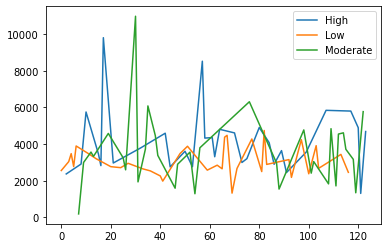

In [50]:
all_in_one.groupby('shop_profile')['factor'].plot(legend=True)

In [54]:
all_in_one.groupby('shop_profile')['factor'].mean()

shop_profile
High        4125.488606
Low         3091.275133
Moderate    3542.871301
Name: factor, dtype: float64

In [62]:
all_in_one.groupby('shop_profile')['factor'].std()

shop_profile
High        1734.041516
Low          777.694785
Moderate    1962.284259
Name: factor, dtype: float64

In [58]:
test

,shop_id,shop_profile
0,SHOP046,NaN
1,SHOP024,NaN
2,SHOP023,NaN
3,SHOP097,NaN
4,SHOP044,NaN
5,SHOP030,NaN
6,SHOP038,NaN
7,SHOP029,NaN
8,SHOP096,NaN
9,SHOP092,NaN


In [60]:
test_merged = all_in_one[all_in_one["shop_id"].isin(test["shop_id"])]
test_merged

,index,shop_id,shop_area_sq_ft,shop_profile,income,quantity_sold,factor
1,117,SHOP002,637,NaN,3084455,9568,4842.158556
18,116,SHOP019,411,NaN,2200580,7173,5354.209246
22,102,SHOP023,617,NaN,2570425,7946,4166.004862
23,101,SHOP024,676,NaN,1308795,5274,1936.087278
28,107,SHOP029,597,NaN,1973805,7352,3306.206030
29,105,SHOP030,530,NaN,2862995,7687,5401.877358
37,106,SHOP038,411,NaN,1444025,5728,3513.442822
43,104,SHOP044,715,NaN,1310440,4965,1832.783217
45,100,SHOP046,545,NaN,2607865,6941,4785.073394
49,120,SHOP050,411,NaN,2399125,7668,5837.287105


mean
High        4125.488606
Low         3091.275133
Moderate    3542.871301

std
High        1734.041516
Low          777.694785
Moderate    1962.284259

In [66]:
(3542.871301*777.694785+3091.275133*1962.284259)/(1962.284259+777.694785)

3219.45275010574

In [67]:
(4125.488606*1962.284259+3542.871301*1734.041516)/(1734.041516+1962.284259)

3852.1678392961953

In [ ]:
conditions = [
    (test_merged["factor"] < 3219.45275010574),
    (test_merged["factor"] >= 3219.45275010574) and (test_merged["factor"] < 3852.1678392961953),
    (test_merged["factor"] >= 3852.1678392961953)
]

values = ["Low","Moderate","High"]

test_merged["shop_profile"] = np.select(conditions,values)

test_merged

In [73]:
for ind in test.index:
    for shop in all_in_one.index:
        if test['shop_id'][ind]==all_in_one['shop_id'][shop]:
            fact = all_in_one['factor'][shop]
            if fact < 3219.45275010574:
                test['shop_profile'][ind] = 'Low'
            elif fact < 3852.1678392961953:
                test['shop_profile'][ind] = 'Moderate'
            else :
                test['shop_profile'][ind] = 'High'

test

C:\Users\thimi\AppData\Local\Temp\ipykernel_21396\2651578005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['shop_profile'][ind] = 'High'


,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,High
3,SHOP097,High
4,SHOP044,Low
5,SHOP030,High
6,SHOP038,Moderate
7,SHOP029,Moderate
8,SHOP096,Moderate
9,SHOP092,Low


In [74]:
test.to_csv("day01.csv", index=False)